In [ ]:
import pandas as pd
import numpy as np

df=pd.read_csv("student_study.csv")
df.head()

,Student_ID,Prev_Score,Subject_Difficulty,Sleep_Hours,Attendance,Study_Hours_Last_Week,Phone_Usage_Hours,Stress_Level,Recommended_Study_Time
0,S0001,34,Easy,7.7,64,0.9,9,Low,NaN
1,S0002,95,Medium,4.2,63,2.9,9,Low,NaN
2,S0003,89,Medium,NaN,67%,0.5,3,High,NaN
3,S0004,74,Medium,5.4,98%,0.9,2,Medium,NaN
4,S0005,64,Hard,5.3,96%,1.0,7,Low,NaN


In [ ]:
df['Attendance']=df['Attendance'].astype(str)
df['Attendance']=df['Attendance'].str.replace("%", "")
df['Attendance']=df['Attendance'].astype(int)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Student_ID              2600 non-null   object 
 1   Prev_Score              2600 non-null   int64  
 2   Subject_Difficulty      2600 non-null   object 
 3   Sleep_Hours             1724 non-null   object 
 4   Attendance              2600 non-null   int64  
 5   Study_Hours_Last_Week   2600 non-null   float64
 6   Phone_Usage_Hours       2600 non-null   int64  
 7   Stress_Level            2600 non-null   object 
 8   Recommended_Study_Time  0 non-null      float64
dtypes: float64(2), int64(3), object(4)
memory usage: 182.9+ KB


In [ ]:
df['Sleep_Hours'].unique()
df=df[df['Sleep_Hours']!='?']
df.reset_index(drop=True, inplace=True)
df.head()

df['Sleep_Hours']=df['Sleep_Hours'].astype(float)
df.head()

df['Sleep_Hours']=df['Sleep_Hours'].fillna(df['Sleep_Hours'].median())
df.head()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1706 entries, 0 to 1705
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Student_ID              1706 non-null   object 
 1   Prev_Score              1706 non-null   int64  
 2   Subject_Difficulty      1706 non-null   object 
 3   Sleep_Hours             1706 non-null   float64
 4   Attendance              1706 non-null   int64  
 5   Study_Hours_Last_Week   1706 non-null   float64
 6   Phone_Usage_Hours       1706 non-null   int64  
 7   Stress_Level            1706 non-null   object 
 8   Recommended_Study_Time  0 non-null      float64
dtypes: float64(3), int64(3), object(3)
memory usage: 120.1+ KB


In [ ]:
df['Recommended_Study_Time']

,Recommended_Study_Time
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1701,NaN
1702,NaN
1703,NaN
1704,NaN


In [ ]:
df['Study_Hours_Last_Week']=np.random.randint(0,70, size=len(df))
df.head()

,Student_ID,Prev_Score,Subject_Difficulty,Sleep_Hours,Attendance,Study_Hours_Last_Week,Phone_Usage_Hours,Stress_Level,Recommended_Study_Time
0,S0001,34,Easy,7.7,64,64,9,Low,NaN
1,S0002,95,Medium,4.2,63,20,9,Low,NaN
2,S0003,89,Medium,6.5,67,67,3,High,NaN
3,S0004,74,Medium,5.4,98,24,2,Medium,NaN
4,S0005,64,Hard,5.3,96,32,7,Low,NaN


In [ ]:
from IPython.core.history import HistorySavingThread
def Recommended_Study_Time(row):
  risk=0

  if row['Prev_Score']<40:
    risk+=4
  elif row['Prev_Score']<=60:
    risk+=3
  elif row['Prev_Score']>=70:
    risk+=1



  if row['Subject_Difficulty']=='Hard':
    risk+=2.5
  elif row['Subject_Difficulty']=='Medium':
    risk+=1.3
  elif row['Subject_Difficulty']=='Easy':
    risk+=0.8


  if row['Attendance']<75:
    risk+=0.5



  if row['Sleep_Hours']<5:
    risk+=0.5
  elif row['Sleep_Hours']>7:
    risk+=1


  if row['Phone_Usage_Hours']>5:
    risk+=1.5
  elif row['Phone_Usage_Hours']>7:
    risk+=1.75

  if risk>=6:
    return 'High'
  elif risk>=4:
    return 'Medium'
  else:
    return 'Low'


df['Recommended_Study_Time']=df.apply(Recommended_Study_Time,axis=1)
df.head()

,Student_ID,Prev_Score,Subject_Difficulty,Sleep_Hours,Attendance,Study_Hours_Last_Week,Phone_Usage_Hours,Stress_Level,Recommended_Study_Time
0,S0001,34,Easy,7.7,64,64,9,Low,High
1,S0002,95,Medium,4.2,63,20,9,Low,Medium
2,S0003,89,Medium,6.5,67,67,3,High,Low
3,S0004,74,Medium,5.4,98,24,2,Medium,Low
4,S0005,64,Hard,5.3,96,32,7,Low,Medium


In [ ]:
df['Recommended_Study_Time'].value_counts()

,count
Recommended_Study_Time,
Medium,611
Low,570
High,525


In [ ]:
mapping={
    'Low':0,
    'Medium':1,
    'High':2
}
df['Recommended_Study_Time']=df['Recommended_Study_Time'].map(mapping)

In [ ]:
df.rename(columns={
    'Subject_Difficulty': 'Subject_Difficulty(Hard/Easy/Medium)',
    'Attendance':'Attendance_%',
    'Stress_Level': 'Stress_Level(High/Low/Medium)'
}, inplace=True)

In [ ]:
df.to_csv("New_clean_student.csv")

In [ ]:
data=pd.read_csv('New_clean_student.csv')
data.head()
data = data.drop(columns=['Unnamed: 0', 'Student_ID'])
data.head()

,Prev_Score,Subject_Difficulty(Hard/Easy/Medium),Sleep_Hours,Attendance_%,Study_Hours_Last_Week,Phone_Usage_Hours,Stress_Level(High/Low/Medium),Recommended_Study_Time
0,34,Easy,7.7,64,64,9,Low,2
1,95,Medium,4.2,63,20,9,Low,1
2,89,Medium,6.5,67,67,3,High,0
3,74,Medium,5.4,98,24,2,Medium,0
4,64,Hard,5.3,96,32,7,Low,1


In [ ]:
X=df.iloc[:, 1:8]
y=df.iloc[:, -1]
X

,Prev_Score,Subject_Difficulty(Hard/Easy/Medium),Sleep_Hours,Attendance_%,Study_Hours_Last_Week,Phone_Usage_Hours,Stress_Level(High/Low/Medium)
0,34,Easy,7.7,64,64,9,Low
1,95,Medium,4.2,63,20,9,Low
2,89,Medium,6.5,67,67,3,High
3,74,Medium,5.4,98,24,2,Medium
4,64,Hard,5.3,96,32,7,Low
...,...,...,...,...,...,...,...
1701,41,Hard,6.5,53,7,3,High
1702,43,Easy,8.7,95,14,3,High
1703,67,Hard,4.4,53,25,1,Medium
1704,35,Hard,5.1,100,23,9,High


In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2,random_state=42)

num_cols=X.select_dtypes(include=['int64', 'float64']).columns
cat_cols=X.select_dtypes(include=['object']).columns

data[num_cols].skew()

,0
Prev_Score,-0.015902
Sleep_Hours,-0.023178
Attendance_%,0.061240
Study_Hours_Last_Week,-0.042848
Phone_Usage_Hours,-0.006926


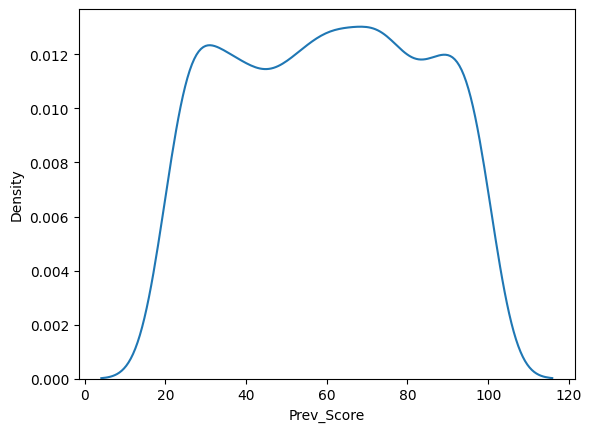

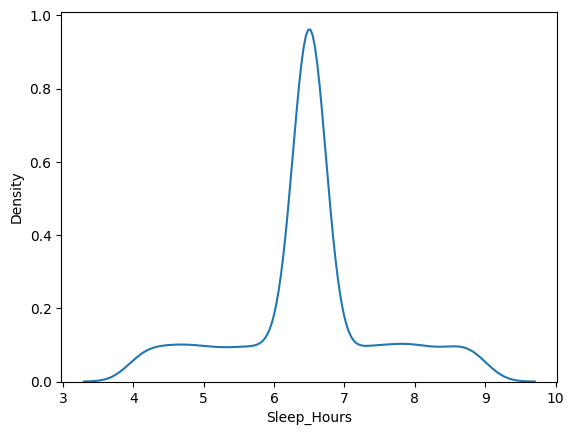

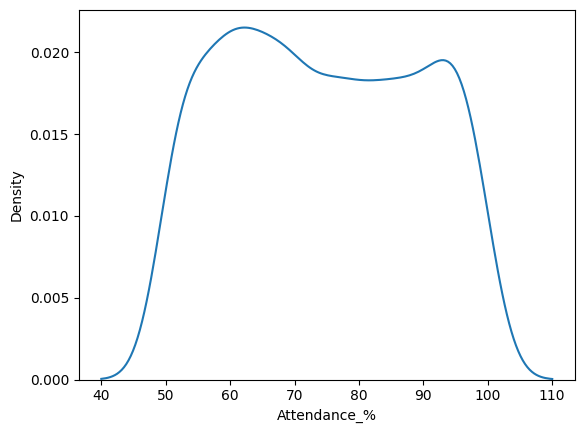

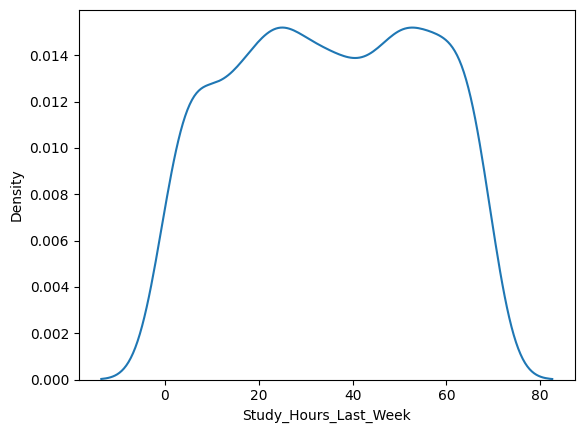

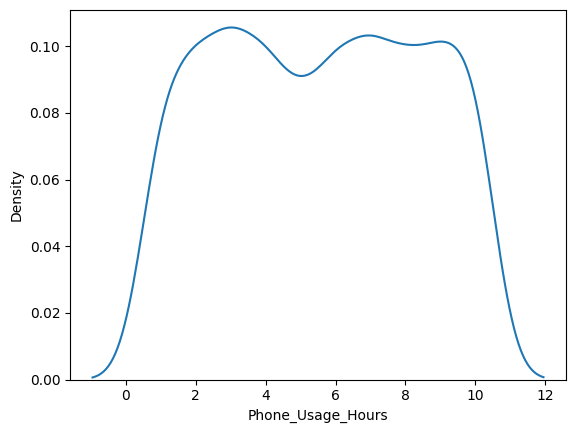

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt



for cols in num_cols:
  sns.kdeplot(data[cols])
  plt.show()

In [ ]:
data.describe()

,Prev_Score,Sleep_Hours,Attendance_%,Study_Hours_Last_Week,Phone_Usage_Hours,Recommended_Study_Time
count,1706.000000,1706.000000,1706.000000,1706.000000,1706.000000,1706.000000
mean,60.192263,6.494490,74.395076,35.126612,5.548066,0.973623
std,23.452841,1.036837,14.777920,20.031539,2.879858,0.800957
min,20.000000,4.000000,50.000000,0.000000,1.000000,0.000000
25%,40.000000,6.500000,62.000000,18.000000,3.000000,0.000000
50%,61.000000,6.500000,74.000000,35.000000,6.000000,1.000000
75%,80.000000,6.500000,87.000000,52.000000,8.000000,2.000000
max,100.000000,9.000000,100.000000,69.000000,10.000000,2.000000


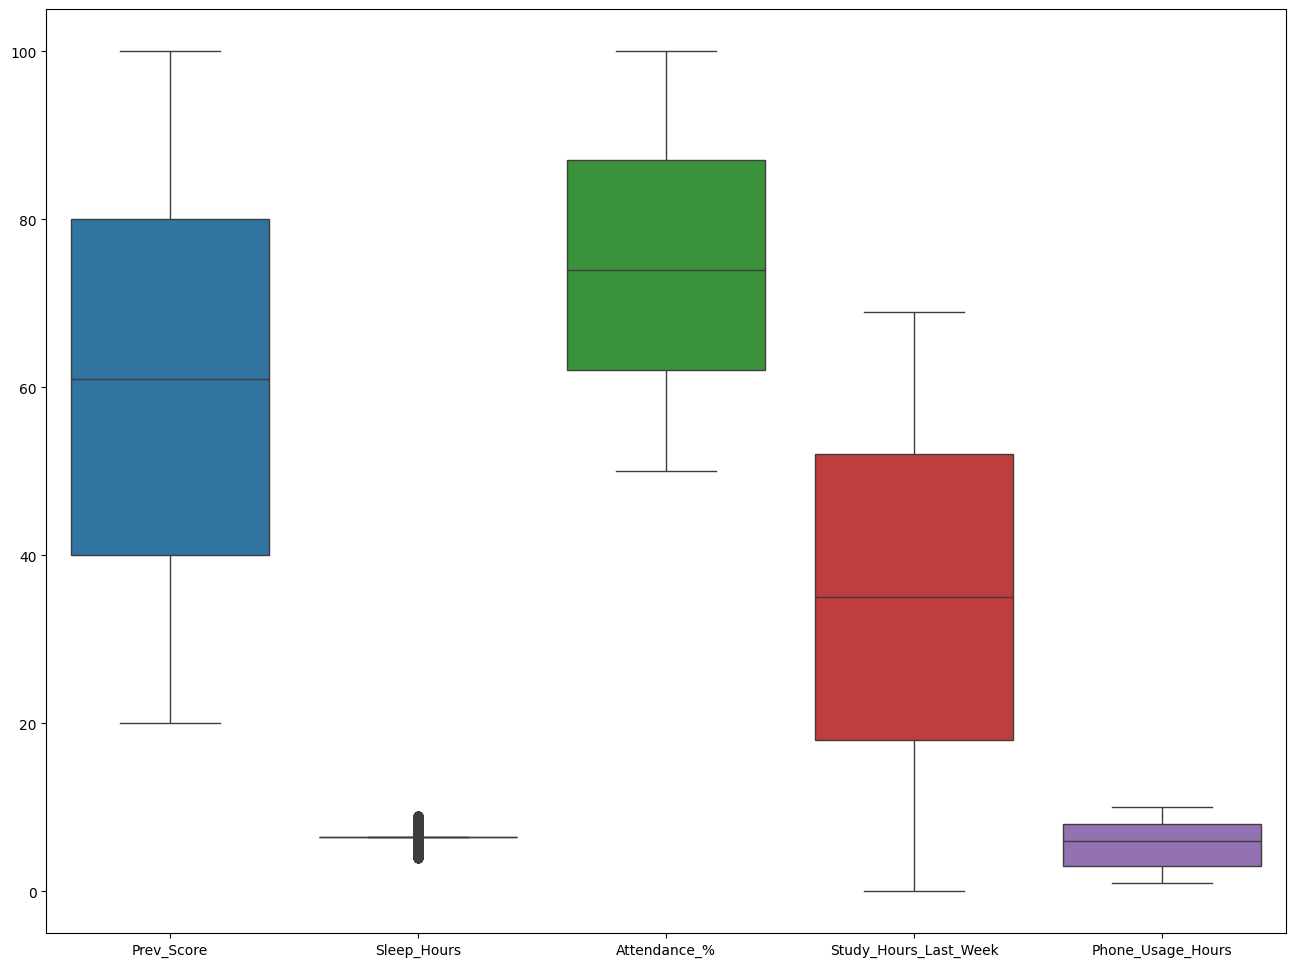

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(16,12))
sns.boxplot(data[num_cols])

plt.show()
plt.clf()

<Axes: xlabel='Subject_Difficulty(Hard/Easy/Medium)', ylabel='count'>

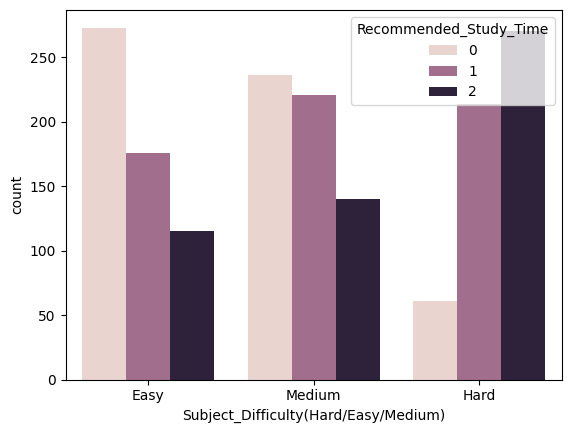

In [ ]:
sns.countplot(x='Subject_Difficulty(Hard/Easy/Medium)', hue='Recommended_Study_Time', data=data)

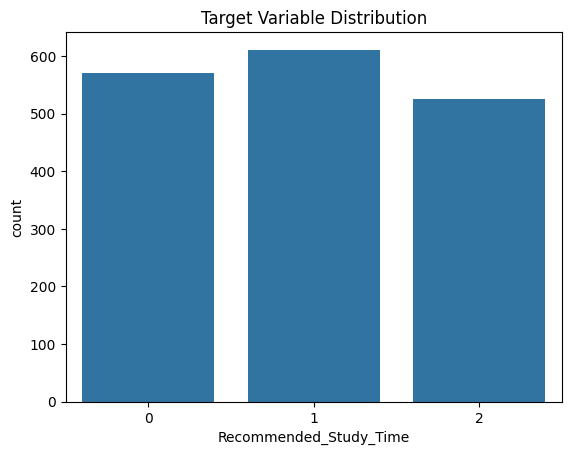

In [ ]:
sns.countplot(x='Recommended_Study_Time', data=data)
plt.title("Target Variable Distribution")
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression


num_trf=Pipeline(steps=[
    ('std', StandardScaler()),
    ('imputer', SimpleImputer(strategy='median'))
])

cat_trf=Pipeline(steps=[
    ('OE', OrdinalEncoder(
        categories=[['Easy', 'Medium', 'Hard'],
                    ['Low', 'Medium', 'High']]
    )),
    ('imputer', SimpleImputer(strategy='most_frequent'))
])


Preprocessor=ColumnTransformer([
    ('num', num_trf, num_cols),
    ('cat', cat_trf, cat_cols)
])

model=Pipeline(steps=[
    ('preprocessor', Preprocessor),
    ('model', DecisionTreeClassifier(
        max_depth=5,
        min_samples_leaf=20,
        random_state=42
    ))
])

In [ ]:
model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('std',
                                                                   StandardScaler()),
                                                                  ('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['Prev_Score', 'Sleep_Hours', 'Attendance_%', 'Study_Hours_Last_Week',
       'Phone_Usage_Hours'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('OE',
                                                                   OrdinalEncoder(categories=[['Easy',
                                                                                               'Medium',
                                                                                               'Hard'],
                                                                                              ['Low',
                                                                                               'Medium',
                                                                                               'High']])),
                                                                  ('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  Index(['Subject_Difficulty(Hard/Easy/Medium)', 'Stress_Level(High/Low/Medium)'], dtype='object'))])),
                ('model',
                 DecisionTreeClassifier(max_depth=5, min_samples_leaf=20,
                                        random_state=42))])

In [ ]:
y_pred=model.predict(X_test)

accuracy_score(y_test, y_pred)

0.8830409356725146

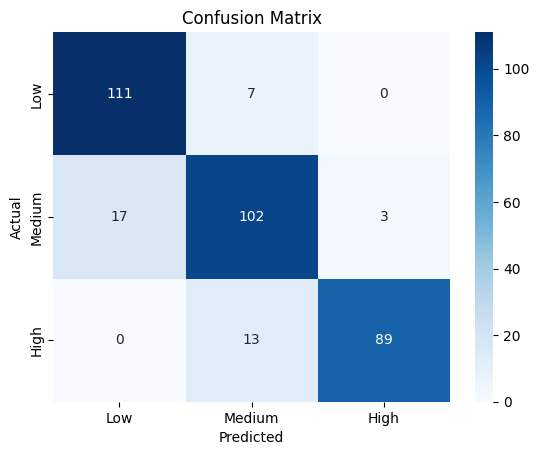

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low', 'Medium', 'High'],
            yticklabels=['Low', 'Medium', 'High'])

plt.xlabel('Predicted')

plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       118
           1       0.84      0.84      0.84       122
           2       0.97      0.87      0.92       102

    accuracy                           0.88       342
   macro avg       0.89      0.88      0.89       342
weighted avg       0.89      0.88      0.88       342



In [ ]:
user_input={}

for col_name in num_cols:
  user_input[col_name]=float(input(f"Enter {col_name}:"))
for col_name in cat_cols:
  value=input(f"Enter {col_name}:")
  user_input[col_name]=value.strip().title()


user_input=pd.DataFrame([user_input])

prediction=model.predict(user_input)


print("="*70)

if prediction==0:
  print("Your Study Time is Perfect Continue")
elif prediction==1:
  print("You Should slightly increase your study time")

else:
  print("Your Study time is too low ")
  print("You Should follow this:")
  print("1.Increase your Study Time")
  print("2.decrease your screen time")
  print("3. Fix your sleep schedule")




Enter Prev_Score:89
Enter Sleep_Hours:7
Enter Attendance_%:68
Enter Study_Hours_Last_Week:43
Enter Phone_Usage_Hours:5
Enter Subject_Difficulty(Hard/Easy/Medium):easy
Enter Stress_Level(High/Low/Medium):medium
Your Study Time is Perfect Continue
